# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)



In [2]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [63]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2
from google.colab import data_table
data_table.enable_dataframe_formatter()
# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


In [10]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
MyDrive


In [16]:
!ls '/content/drive/MyDrive/Colab Notebooks/NYC_Taxi_2023/trip_records'
data_path = '/content/drive/MyDrive/Colab Notebooks/NYC_Taxi_2023/trip_records'

2023-10.parquet  2023-1.parquet  2023-4.parquet  2023-7.parquet
2023-11.parquet  2023-2.parquet  2023-5.parquet  2023-8.parquet
2023-12.parquet  2023-3.parquet  2023-6.parquet  2023-9.parquet


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [18]:
# Try loading one file
# df["State Code"] = df["State Code"].astype(str)
df = pd.read_parquet(f'{data_path}/2023-1.parquet')
df.info()
# there are 3041714 rows and 19 columns

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [19]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
data_path = '/content/drive/MyDrive/Colab Notebooks/NYC_Taxi_2023/trip_records'
if not os.path.exists(data_path):
    print(f"Directory {data_path} does not exist. Please check the path.")
    print(f"Current working directory: {os.getcwd()}")
else:
    os.chdir(data_path)

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        month_df = pd.read_parquet(file_path)
        # Extract date and hour from pickup datetime
        month_df['pickup_date'] = month_df['tpep_pickup_datetime'].dt.date
        month_df['pickup_hour'] = month_df['tpep_pickup_datetime'].dt.hour

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in month_df['pickup_date'].unique():
            date_df = month_df[month_df['pickup_date'] == date]
            # Iterate through each hour of the selected date
            for hour in range(24):
                hour_df = date_df[date_df['pickup_hour'] == hour]
                if len(hour_df) > 0:
                    # Sample 5% of the hourly data randomly
                    hour_sample = hour_df.sample(frac=0.05, random_state=42)
                    # add data of this hour to the dataframe
                    sampled_data = pd.concat([sampled_data, hour_sample], axis=0)
        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], axis=0)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [22]:
# Store the df in csv/parquet
df.to_parquet('/content/nyc_taxi_2023_combined.parquet', index=False)


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [23]:
# Load the new data file
df = pd.read_parquet('/content/nyc_taxi_2023_combined.parquet')
df.shape


(1896400, 22)

In [24]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,pickup_hour,airport_fee
0,2,2023-09-01 00:39:59,2023-09-01 01:00:28,NaN,4.71,NaN,None,113,238,0,...,0.5,4.32,0.00,1.0,33.15,NaN,NaN,2023-09-01,0,NaN
1,2,2023-09-01 00:24:50,2023-09-01 00:27:19,2.0,0.56,1.0,N,142,142,2,...,0.5,0.00,0.00,1.0,10.10,2.5,0.00,2023-09-01,0,NaN
2,2,2023-09-01 00:19:27,2023-09-01 01:04:02,2.0,18.46,2.0,N,132,163,1,...,0.5,15.71,6.94,1.0,98.40,2.5,1.75,2023-09-01,0,NaN
3,2,2023-09-01 00:42:13,2023-09-01 01:20:20,2.0,13.71,1.0,N,249,180,4,...,0.5,0.00,0.00,1.0,64.70,2.5,0.00,2023-09-01,0,NaN
4,2,2023-09-01 00:11:38,2023-09-01 00:17:56,1.0,0.71,1.0,N,144,232,1,...,0.5,2.00,0.00,1.0,14.90,2.5,0.00,2023-09-01,0,NaN


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  pickup_date           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

In [32]:
# Passenger count is float, it should be in integer
df['passenger_count'] = df['passenger_count'].astype('Int8')
df['RatecodeID'] = df['RatecodeID'].astype('Int8')
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')
# Optimizing integer column
df['VendorID'] = df['VendorID'].astype('int8')
df['payment_type'] = df['payment_type'].astype('int8')
df['PULocationID'] = df['PULocationID'].astype('int16')
df['DOLocationID'] = df['DOLocationID'].astype('int16')
df['pickup_hour'] = df['pickup_hour'].astype('int8')
# Optimizing float column
float_cols = df.select_dtypes('float64').columns
df[float_cols] = df[float_cols].astype('float32')


In [34]:
# this is redundant as we already have 'tpep_pickup_datetime' column
df = df.drop(columns=['pickup_date'])

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [47]:
# Fix the index and drop any columns that are not needed
df = df.reset_index(drop=True)
df.info(memory_usage='deep')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1808436 entries, 0 to 1808435
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int8          
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        Int8          
 4   trip_distance          float32       
 5   RatecodeID             Int8          
 6   store_and_fwd_flag     category      
 7   PULocationID           int16         
 8   DOLocationID           int16         
 9   payment_type           int8          
 10  fare_amount            float32       
 11  extra                  float32       
 12  mta_tax                float32       
 13  tip_amount             float32       
 14  tolls_amount           float32       
 15  improvement_surcharge  float32       
 16  total_amount           float32       
 17  congestion_surcharge   float32       
 18  pickup_hour           

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [28]:
# Combine the two airport fee columns

(df['Airport_fee'] == df['airport_fee']).sum()  # there is not a single row where both columns are equal
df[['Airport_fee','airport_fee']].isna().sum()
# Airport _fee
#     Nulls: 213,357
#     Non Nulls: 1,896,400 − 213,357 = 1,683,043
# airport_fee
#     Nulls: 1,747,917
#     Non Nulls: 1,896,400 − 1,747,917 = 148,483
# Most data is in Airport fee and they do not overlap, hence combining it
df['airport_fee'] = df['airport_fee'].combine_first(df['Airport_fee'])


In [29]:
# dropping duplicate column
df = df.drop(columns=['Airport_fee'])


In [30]:
df['airport_fee'].isna().sum()

np.int64(64874)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [36]:
# check where values of fare amount are negative

money_cols = [
    'fare_amount', 'extra', 'mta_tax', 'tip_amount',
    'tolls_amount', 'improvement_surcharge',
    'total_amount', 'congestion_surcharge', 'airport_fee'
]

for col in money_cols:
    print(col, (df[col] < 0).sum())

fare_amount 0
extra 3
mta_tax 73
tip_amount 0
tolls_amount 0
improvement_surcharge 78
total_amount 78
congestion_surcharge 56
airport_fee 15


In [37]:
# find any trip which has zero-distance
(df['trip_distance'] <= 0).sum()

np.int64(37732)

Did you notice something different in the `RatecodeID` column for above records?

In [38]:
# Identify negative fares
df[df['fare_amount'] < 0].shape


(0, 20)

In [39]:
# Analyse RatecodeID for the negative fare amounts
df[df['fare_amount'] < 0]['RatecodeID'].value_counts(dropna=False)

,count
RatecodeID,


In [40]:
# Identify payment type
df[df['fare_amount'] < 0]['payment_type'].value_counts()

,count
payment_type,


In [41]:
# Find which columns have negative values
neg_cols = {}

for col in df.columns:
    if df[col].dtype in ['float32', 'float64', 'int8', 'int16', 'int32', 'Int8']:
        count = (df[col] < 0).sum()
        if count > 0:
            neg_cols[col] = count

neg_cols



{'extra': np.int64(3),
 'mta_tax': np.int64(73),
 'improvement_surcharge': np.int64(78),
 'total_amount': np.int64(78),
 'congestion_surcharge': np.int64(56),
 'airport_fee': np.int64(15)}

In [42]:
# fix these negative values
amount_cols = [
    'fare_amount', 'extra', 'mta_tax', 'tip_amount',
    'tolls_amount', 'improvement_surcharge',
    'total_amount', 'congestion_surcharge', 'airport_fee'
]

for col in amount_cols:
    df = df[df[col] >= 0]



In [43]:
# removing zero/negative distance trips
df = df[df['trip_distance'] > 0]

In [44]:
# Reset index after dropping rows
df = df.reset_index(drop=True)
df.shape

(1808436, 20)

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [46]:
# Find the proportion of missing values in each column
missing_cnts = df.isna().sum()
missing_pct = (missing_cnts / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_cnts,
    'Missing_Percent': missing_pct
})

missing_df[missing_df['Missing_Count'] > 0].sort_values(by='Missing_Percent', ascending=False)

,Missing_Count,Missing_Percent


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [50]:
# Display the rows with null values
df[df['passenger_count'].isna()].head()
df['passenger_count'].isna().sum()
# Impute NaN values in 'passenger_count'
median_passenger = df['passenger_count'].median()
df['passenger_count'] = df['passenger_count'].fillna(median_passenger)

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [52]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].isna().sum()
df['RatecodeID'] = df['RatecodeID'].fillna(1)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [53]:
# handle null values in congestion_surcharge
df['congestion_surcharge'].isna().sum()
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0)


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values
df['airport_fee'] = df['airport_fee'].fillna(0)
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna('N')
df.isna().sum()

In [60]:
# Trip duration sanity
(df['tpep_dropoff_datetime'] < df['tpep_pickup_datetime']).sum()

np.int64(43)

In [ ]:
# Sanity check
df['passenger_count'].describe()

In [ ]:
# Monetary consistent check
df[df['total_amount'] < df['fare_amount']].shape

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
df.describe()

In [ ]:
# Check for potential out of place values in various columns
df[df['trip_distance'] > 100]


In [ ]:
df[df['fare_amount'] > 500]

In [ ]:
df[df['total_amount'] > 500]

In [ ]:
df[df['passenger_count'] > 6]

In [ ]:
df[(df['pickup_hour'] < 0) | (df['pickup_hour'] > 23)]

In [ ]:
df[~df['RatecodeID'].isin([1,2,3,4,5,6])]

In [ ]:
# Check payment type is in Credit, Cash, No Charge, Dispute, Unknown etc
df[~df['payment_type'].isin([1,2,3,4,5,6])]

Major Red Flags From The describe() is found
Trip distance is very high, max 56,823.
Fare amount: max 143163
Total amount: max 143,167
passenger count: max = 9, min = 0.
RatecodeID max is 99
payment_type max = 4


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [73]:
print("Distance >200:", (df['trip_distance'] > 200).sum())
print("Fare >500:", (df['fare_amount'] > 500).sum())
print("Invalid passenger_count:", df[(df['passenger_count'] <= 0) | (df['passenger_count'] > 6)].shape[0])
print("Invalid RatecodeID:", df[~df['RatecodeID'].isin([1,2,3,4,5,6])].shape[0])

Distance >200: 21
Fare >500: 16
Invalid passenger_count: 28799
Invalid RatecodeID: 9315


In [ ]:
# remove passenger_count > 6
df[(df['passenger_count'] <= 0) | (df['passenger_count'] > 6)]

In [76]:
# Continue with outlier handling
df[(df['trip_distance'] < 0.1) & (df['fare_amount'] > 300)]
((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300)).sum()
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]

# Removing any

In [79]:
# trip_distance == 0 AND fare_amount == 0 but PULocationID ≠ DOLocationID
# Identify
df[(df['trip_distance'] == 0) &
   (df['fare_amount'] == 0) &
   (df['PULocationID'] != df['DOLocationID'])]

df = df[~(
    (df['trip_distance'] == 0) &
    (df['fare_amount'] == 0) &
    (df['PULocationID'] != df['DOLocationID'])
)]

In [81]:
# Trip distance > 250
(df['trip_distance'] > 250).sum()
df = df[df['trip_distance'] <= 250]

In [83]:
# payment_type == 0
(df['payment_type'] == 0).sum()
df = df[df['payment_type'] != 0]

In [84]:
df = df.reset_index(drop=True)
df.shape

(1808416, 20)

In [86]:
# Do any columns need standardising?

df[['trip_distance','fare_amount','total_amount','tip_amount']].describe(percentiles=[0.95,0.99])
df = df[df['trip_distance'] <= 100]
df = df[df['fare_amount'] <= 500]
df = df[df['total_amount'] <= 600]
df = df[df['tip_amount'] <= 100]
df = df.reset_index(drop=True)


In [ ]:
df[['trip_distance','fare_amount','total_amount','tip_amount']].describe(percentiles=[0.95,0.99])

In [ ]:
# Trip duration check
df['trip_duration'] = (
    df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
).dt.total_seconds() / 60

df['trip_duration'].describe(percentiles=[0.01,0.99])


In [91]:
# if fare is zero, then tip is zero
df['tip_percent'] = np.where(
    df['fare_amount'] > 0,
    (df['tip_amount'] / df['fare_amount']) * 100,
    0
)

In [ ]:
df['tip_percent'].describe(percentiles=[0.95,0.99])


In [93]:
# Removing rows where tip_percent > 200
df = df[df['tip_percent'] <= 200]
df = df.reset_index(drop=True)


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [ ]:
# Numerical Variables :
# passenger_count (Discrete)
# trip_distance (Continuous)
# pickup_hour (Discrete / cyclical)
# trip_duration (Continuous)


# Categorical Variables
# VendorID
# RatecodeID
# PULocationID
# DOLocationID
# payment_type


# Numerical Variables
# fare_amount
# tip_amount
# total_amount
# tolls_amount
# extra
# congestion_surcharge
# airport_fee
# mta_tax
# improvement_surcharge

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [ ]:
# Find and show the hourly trends in taxi pickups
hourly_trend = (
    df
    .groupby('pickup_hour')
    .size()
    .reset_index(name='pickup_count')
    .sort_values('pickup_hour')
)

hourly_trend

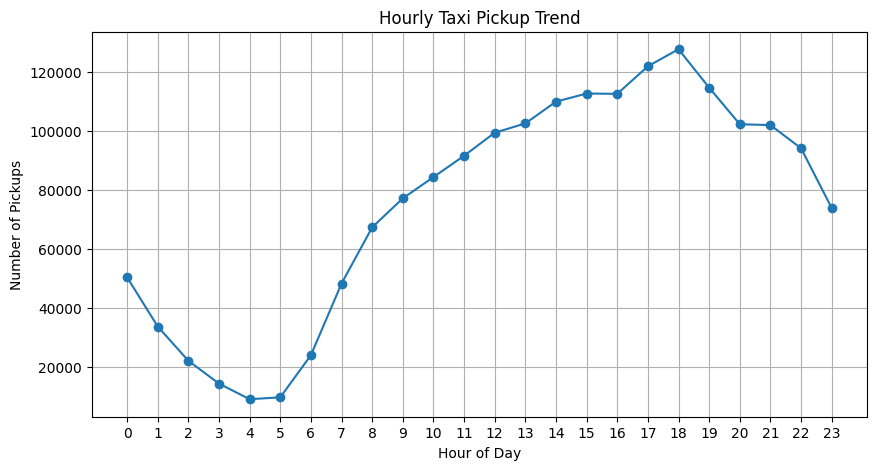

In [96]:
plt.figure(figsize=(10,5))
plt.plot(hourly_trend['pickup_hour'],
         hourly_trend['pickup_count'],
         marker='o')

plt.title('Hourly Taxi Pickup Trend')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

0-5 AM
* Lowest demand
* Gradual decline after midnight
* Minimum around 4-5 AM

6-9 AM (Morning Rush)
* Sharp increase
* Office commute
* Airport traffic

10 AM-3 PM
* Moderate stable demand
* Business & tourism traffic

4-7 PM (Evening Peak)
* Highest demand
* Office commute + social activity

8-11 PM
* Still high
* Dinner, nightlife, events

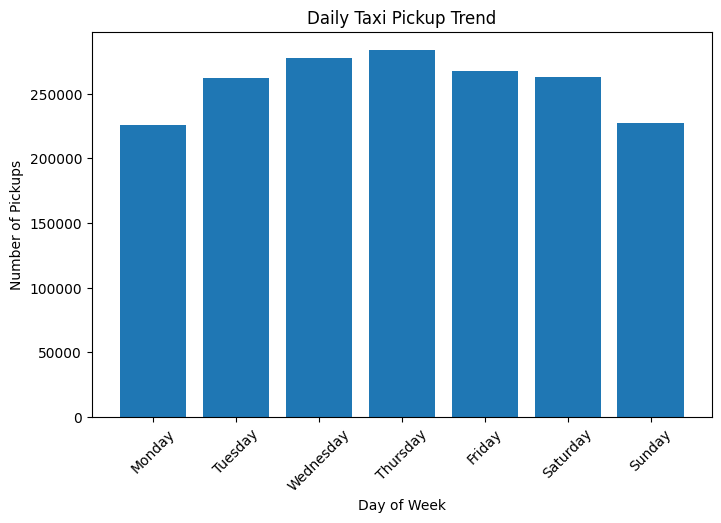

In [97]:
# Find and show the daily trends in taxi pickups (days of the week)
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
daily_trend = (
    df
    .groupby('day_of_week')
    .size()
    .reset_index(name='pickup_count')
    .sort_values('day_of_week')
)

daily_trend

day_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

daily_trend['day_name'] = daily_trend['day_of_week'].map(day_map)
daily_trend

plt.figure(figsize=(8,5))
plt.bar(daily_trend['day_name'], daily_trend['pickup_count'])

plt.title('Daily Taxi Pickup Trend')
plt.xlabel('Day of Week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.show()

The demand is primarily weekday driven, rather than weekends. This indicate
strong commercial usage, office commute, corporate travel

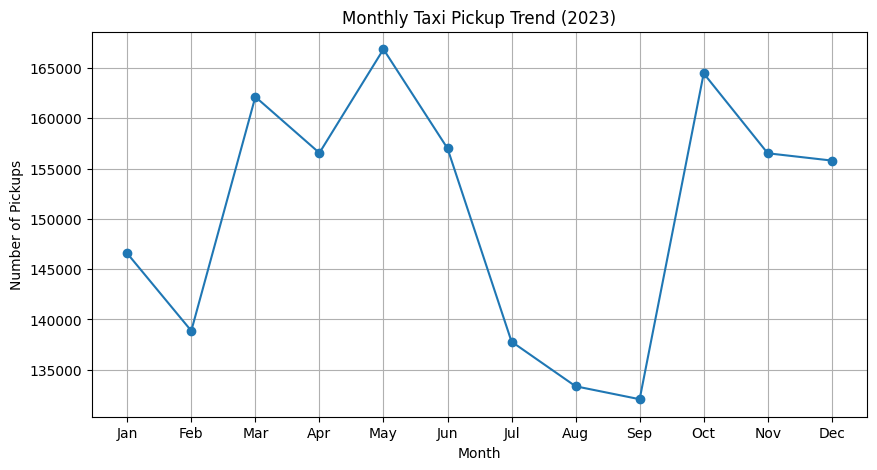

In [100]:
# Show the monthly trends in pickups

df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
monthly_trend = (
    df
    .groupby('pickup_month')
    .size()
    .reset_index(name='pickup_count')
    .sort_values('pickup_month')
)

month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

monthly_trend['month_name'] = monthly_trend['pickup_month'].map(month_map)
monthly_trend

plt.figure(figsize=(10,5))
plt.plot(monthly_trend['month_name'],
         monthly_trend['pickup_count'],
         marker='o')

plt.title('Monthly Taxi Pickup Trend (2023)')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.grid(True)
plt.show()

The demand is business and tourism driven, Spring and Fall outperform summer.
October rebound is very strong
September is weakest month.

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [101]:
# Analyse the above parameters

cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in cols:
    print(col, "negative values:", (df[col] < 0).sum())


fare_amount negative values: 0
tip_amount negative values: 0
total_amount negative values: 0
trip_distance negative values: 0


In [102]:
for col in cols:
    print(col, "zero values:", (df[col] == 0).sum())

fare_amount zero values: 255
tip_amount zero values: 395474
total_amount zero values: 75
trip_distance zero values: 0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

Answer: Create a derived filtered datasets when necessary, as dataset is already clean. zero values represents legitimate business cases and not errors

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [103]:
# Create a df with non zero entries for the selected parameters.
# A distance 0 indicates, cancelled trips, Meter issue etc. In our case the trip_distance is already cleaned
# To drop fare_amount / total_amount. This is extremly small 0.02%
# To drop tip_amount, which is around 22%. Many riders don't tip, dropping these values will distort tipping behaviour

# Hence removing only zero fare & total
df_nonzero = df[
    (df['fare_amount'] > 0) &
    (df['total_amount'] > 0)
].copy()

df_nonzero.shape


(1807701, 24)

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

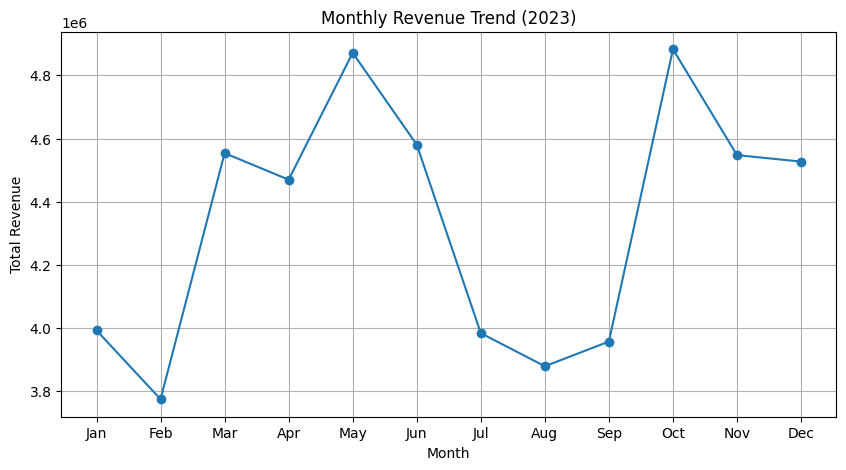

In [105]:
# Group data by month and analyse monthly revenue
df_nonzero['pickup_month'] = df_nonzero['tpep_pickup_datetime'].dt.month

monthly_revenue = (
    df_nonzero
    .groupby('pickup_month')['total_amount']
    .sum()
    .reset_index()
    .sort_values('pickup_month')
)


month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

monthly_revenue['month_name'] = monthly_revenue['pickup_month'].map(month_map)

plt.figure(figsize=(10,5))
plt.plot(monthly_revenue['month_name'],
         monthly_revenue['total_amount'],
         marker='o')

plt.title('Monthly Revenue Trend (2023)')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()


Two strong review Peaks, May and October, Lowest month February. The revenue pattern matches pickup trend.

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

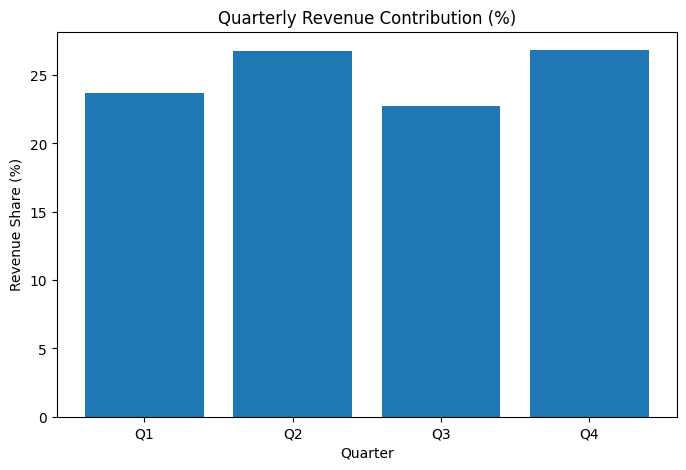

In [106]:
# Calculate proportion of each quarter
df_nonzero['pickup_quarter'] = df_nonzero['tpep_pickup_datetime'].dt.quarter

quarterly_revenue = (
    df_nonzero
    .groupby('pickup_quarter')['total_amount']
    .sum()
    .reset_index()
    .sort_values('pickup_quarter')
)

total_revenue_year = quarterly_revenue['total_amount'].sum()

quarterly_revenue['revenue_percent'] = (
    quarterly_revenue['total_amount'] / total_revenue_year
) * 100


plt.figure(figsize=(8,5))
plt.bar(quarterly_revenue['pickup_quarter'],
        quarterly_revenue['revenue_percent'])

plt.title('Quarterly Revenue Contribution (%)')
plt.xlabel('Quarter')
plt.ylabel('Revenue Share (%)')
plt.xticks([1,2,3,4], ['Q1','Q2','Q3','Q4'])
plt.show()




**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

Correlation between trip_distance and fare_amount: 0.9454029735489371


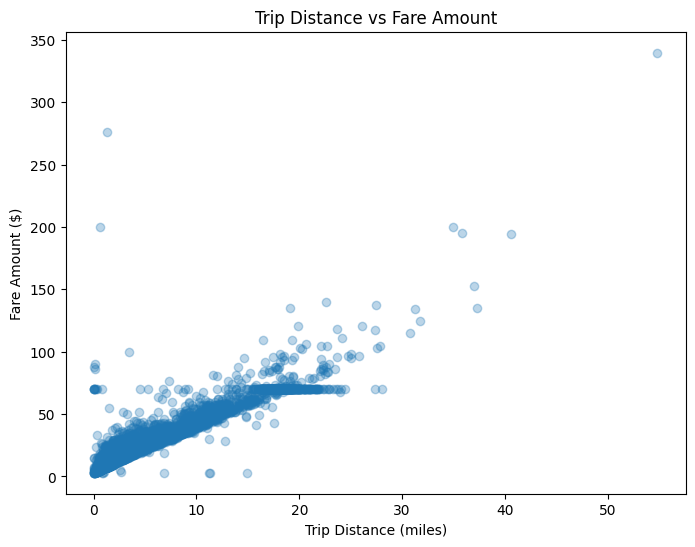

In [107]:
# Show how trip fare is affected by distance
df_distance = df_nonzero[df_nonzero['trip_distance'] > 0].copy()

correlation = df_distance['trip_distance'].corr(df_distance['fare_amount'])
print("Correlation between trip_distance and fare_amount:", correlation)


sample_df = df_distance.sample(n=10000, random_state=42)

plt.figure(figsize=(8,6))
plt.scatter(sample_df['trip_distance'],
            sample_df['fare_amount'],
            alpha=0.3)

plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

Correlation between trip_duration and fare_amount: 0.8419094232954716


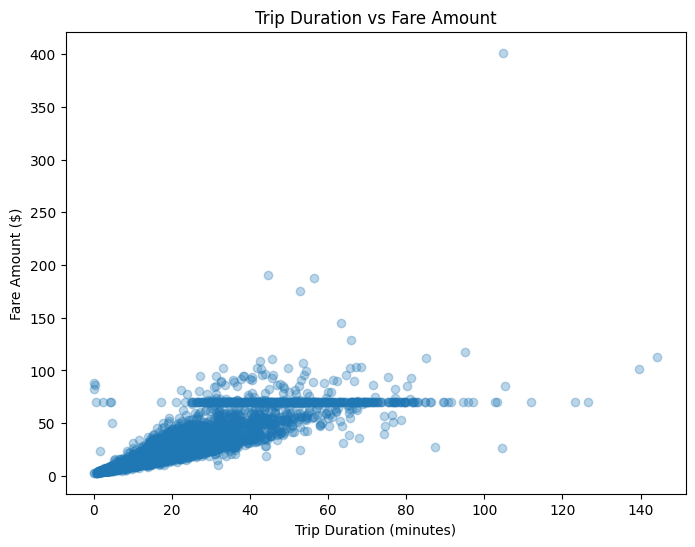

In [108]:
# Show relationship between fare and trip duration
df_nonzero['trip_duration'] = (
    df_nonzero['tpep_dropoff_datetime'] -
    df_nonzero['tpep_pickup_datetime']
).dt.total_seconds() / 60


df_duration = df_nonzero[
    (df_nonzero['trip_duration'] > 0) &
    (df_nonzero['trip_duration'] <= 300)
].copy()

corr_duration = df_duration['trip_duration'].corr(df_duration['fare_amount'])
print("Correlation between trip_duration and fare_amount:", corr_duration)

sample_duration = df_duration.sample(n=10000, random_state=42)

plt.figure(figsize=(8,6))
plt.scatter(sample_duration['trip_duration'],
            sample_duration['fare_amount'],
            alpha=0.3)

plt.title('Trip Duration vs Fare Amount')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.show()


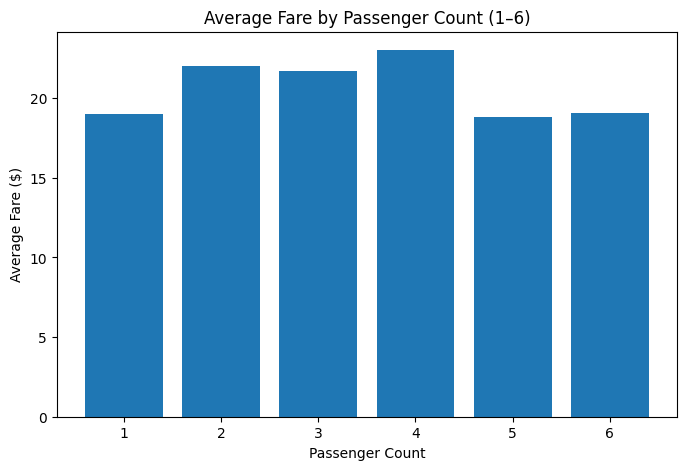

Correlation between passenger_count and fare_amount: 0.04200661255739964


In [112]:
# Show relationship between fare and number of passengers

df_nonzero['passenger_count'].value_counts().sort_index()
df_passenger = df_nonzero[
    (df_nonzero['passenger_count'] >= 1) &
    (df_nonzero['passenger_count'] <= 6)
].copy()

fare_by_passenger = (
    df_passenger
    .groupby('passenger_count')['fare_amount']
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,5))
plt.bar(fare_by_passenger['passenger_count'],
        fare_by_passenger['fare_amount'])

plt.title('Average Fare by Passenger Count (1–6)')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare ($)')
plt.show()

corr_passenger = df_passenger['passenger_count'].corr(df_passenger['fare_amount'])
print("Correlation between passenger_count and fare_amount:", corr_passenger)


In [115]:
# Show relationship between tip and trip distance

df_tip_dist = df_nonzero[df_nonzero['trip_distance'] > 0].copy()
corr_tip_distance = df_tip_dist['trip_distance'].corr(df_tip_dist['tip_amount'])
print("Correlation between trip_distance and tip_amount:", corr_tip_distance)


Correlation between trip_distance and tip_amount: 0.599381322870262


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

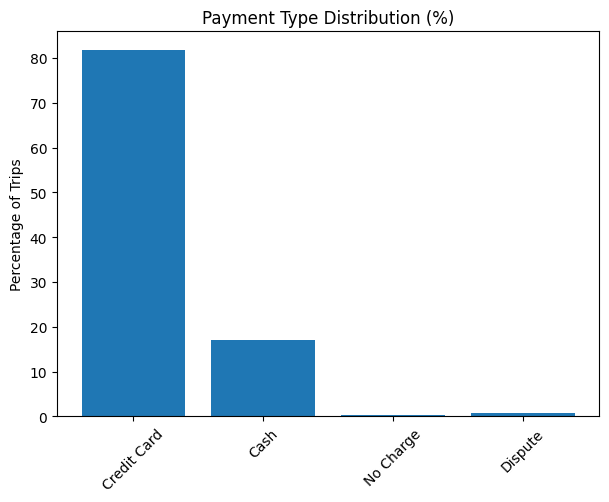

In [116]:
# Analyse the distribution of different payment types (payment_type).
payment_counts = (
    df_nonzero['payment_type']
    .value_counts()
    .sort_index()
)

payment_percent = (
    df_nonzero['payment_type']
    .value_counts(normalize=True)
    .sort_index()
    * 100
)

payment_summary = pd.DataFrame({
    'Count': payment_counts,
    'Percent': payment_percent
})

payment_map = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute'
}

payment_summary.index = payment_summary.index.map(payment_map)

plt.figure(figsize=(7,5))
plt.bar(payment_summary.index,
        payment_summary['Percent'])

plt.title('Payment Type Distribution (%)')
plt.ylabel('Percentage of Trips')
plt.xticks(rotation=45)
plt.show()








- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute

From the output, disputes are rare, indicates operational quality is good

##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('/content/taxi_zones/taxi_zones.shp')
zones.head()

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

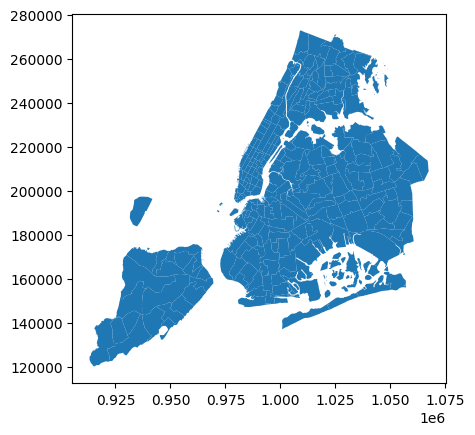

In [211]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using locationID and PULocationID
zones.columns

df_merged = df_nonzero.merge(
    zones[['LocationID', 'zone', 'borough', 'geometry']],
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
)

df_merged = gpd.GeoDataFrame(df_merged, geometry='geometry')
df_merged[['PULocationID', 'zone', 'borough']].head()


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [133]:
# Group data by location and calculate the number of trips

trip_counts = (
    df_nonzero
    .groupby('PULocationID')
    .size()
    .reset_index(name='trip_count')
)

trip_counts = trip_counts.merge(
    zones[['LocationID', 'zone', 'borough']],
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
)

top_zones = (
    trip_counts
    .sort_values('trip_count', ascending=False)
    .head(10)
)

borough_trips = (
    trip_counts
    .groupby('borough')['trip_count']
    .sum()
    .sort_values(ascending=False)
)

borough_trips





,trip_count
borough,
Manhattan,1603603
Queens,176377
Brooklyn,9069
Bronx,2379
Staten Island,86
EWR,45


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [134]:
# Merge trip counts back to the zones GeoDataFrame

trip_counts = (
    df_nonzero
    .groupby('PULocationID')
    .size()
    .reset_index(name='trip_count')
)

zones_with_trips = zones.merge(
    trip_counts,
    left_on='LocationID',
    right_on='PULocationID',
    how='left'
)

zones_with_trips['trip_count'] = (
    zones_with_trips['trip_count'].fillna(0)
)

zones_with_trips.head()
zones_with_trips.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   OBJECTID      263 non-null    int32   
 1   Shape_Leng    263 non-null    float64 
 2   Shape_Area    263 non-null    float64 
 3   zone          263 non-null    object  
 4   LocationID    263 non-null    int32   
 5   borough       263 non-null    object  
 6   geometry      263 non-null    geometry
 7   PULocationID  253 non-null    float64 
 8   trip_count    263 non-null    float64 
dtypes: float64(4), geometry(1), int32(2), object(2)
memory usage: 16.6+ KB


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

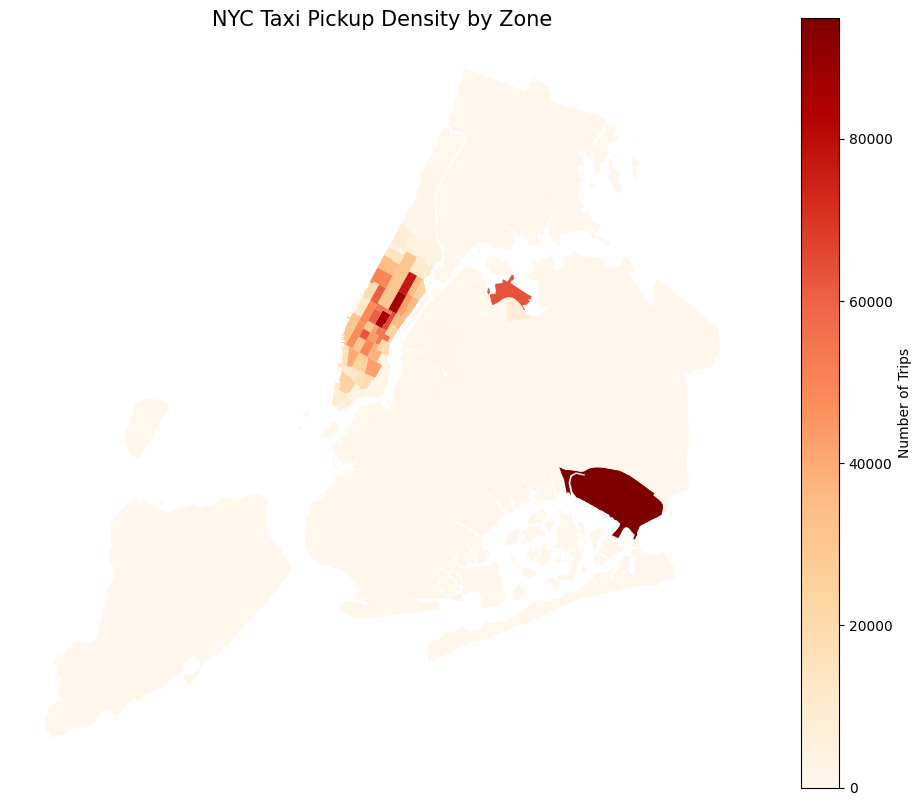

In [136]:
# Define figure and axis
column = 'trip_count',
legend = True,
legend_kwds = {'label': "Number of Trips", 'orientation': "vertical"}

fig, ax = plt.subplots(1, 1, figsize = (12, 10))


# Plot the map and display it
zones_with_trips.plot(
    column='trip_count',
    ax=ax,
    cmap='OrRd',
    legend=True,
    legend_kwds={
        'label': "Number of Trips",
        'orientation': "vertical"
    }
)

ax.set_title("NYC Taxi Pickup Density by Zone", fontsize=15)
ax.axis('off')

plt.show()



In [ ]:
# can you try displaying the zones DF sorted by the number of trips?
# since zones_with_trips already contain trip_count
zones_sorted = zones_with_trips.sort_values(
    by='trip_count',
    ascending=False
)

zones_sorted.head(10)



Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
  * Peak pickup hours occured duing Morning and Evening Commute. This confirms the taxi is heavily used for Work commute, Business Travel, and evening outings
  * Mid week, showed highest pickup. Business activity significantly drives taxi usage.
  * Taxi demand is highly seasonal, Spring & Fall has high demand, late summer demand is low
* Trends in revenue collected
  * Revenue closely follow pickup trend. Revenue variations is primarily driven by trip volume, not price changes. Average fare trip remained relatively stable across months.
* Trends in quarterly revenue
  * Revenue is concentrared in spring and fall. This confirms strong seasnoal demand cycles.
* How fare depends on trip distance, trip duration and passenger counts
  * Strong positive corelation, Fare increases almost linearly with distance.
  * Trip duration has moderate positive correlation. Duration affects fare, especially in traffic-heavy conditions, less strongly than distance.
  * Very weak passenfer correlation, average fare nearly flat across passengers groups. Fare is not dependent on passenger count. Pricing is per trip not per person.
* How tip amount depends on trip distance
  * Moderate positive relationship. Tip amount increases as trip distance increases. Passenger tip based on fare and not on distance.
* Busiest zones
  * High demand areas are Midtown Manhattan, Downtown Manhattan, JFK Airport, LaGuardia Airport.
  * Taxi demand is geographically concentrated in Business districts, Tourism hubs and Airports, Demand is highly centralized rather than evenly distributed.

Overall Key Insights

Taxi demand is commute-driven and business-driven.
Revenue is seasonal, peaking in Spring and Fall.
Distance is the primary driver of fare.
Passenger count has minimal pricing impact.
Tippingp is largely percentage-based.
Manhattan and airports dominate taxi activity.
Demand is clustered geographically and temporally.

#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [210]:
# Find routes which have the slowest speeds at different times of the day
df_routes = df_nonzero.copy()

df_routes['trip_duration_hours'] = df_routes['trip_duration'] / 60

df_routes['route'] = (
    df_routes['PULocationID'].astype(str) +
    " → " +
    df_routes['DOLocationID'].astype(str)
)

route_hour_stats = (
    df_routes
    .groupby(['route', 'pickup_hour'])
    .agg(
        avg_distance=('trip_distance', 'mean'),
        avg_duration=('trip_duration_hours', 'mean'),
        trip_count=('trip_distance', 'count')
    )
    .reset_index()
)

route_hour_stats['speed_mph'] = (
    route_hour_stats['avg_distance'] /
    route_hour_stats['avg_duration']
)

route_hour_stats = route_hour_stats[
    route_hour_stats['trip_count'] > 30
]

route_hour_stats = route_hour_stats[
    (route_hour_stats['speed_mph'] > 1) &
    (route_hour_stats['speed_mph'] < 80)
]

slowest_routes = (
    route_hour_stats
    .sort_values(['pickup_hour', 'speed_mph'])
    .groupby('pickup_hour')
    .head(3)
)

slowest_routes


,route,pickup_hour,avg_distance,avg_duration,trip_count,speed_mph
74292,234 → 113,0,0.867879,0.797205,33,1.088651
96037,263 → 74,0,1.730312,1.579045,32,1.095797
2961,107 → 137,0,0.760513,0.683248,39,1.113085
35776,148 → 148,1,0.618000,0.461368,65,1.339496
40876,158 → 90,1,0.946585,0.668299,41,1.416409
...,...,...,...,...,...,...
6207,113 → 249,22,0.822143,0.678267,42,1.212122
2214,100 → 48,22,1.084000,0.855103,35,1.267683
52923,170 → 230,23,1.035122,0.729533,41,1.418884
29591,142 → 142,23,0.671311,0.467796,61,1.435052


How does identifying high-traffic, high-demand routes help us?

Answer: Better Driving Positioning. Avoid getting stuck repeatedly. Choose better picking timing. Revenue Optimization. Increase driver availability in zones like Business ditricts, Airports, Central Manhattan. Congested routes during peak hours have dynamic pricing. Route optimization to avoid bottleneck

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

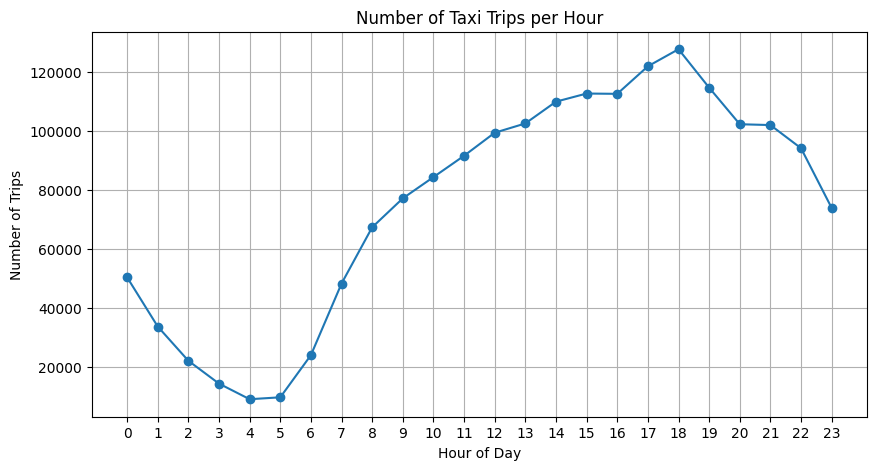

In [209]:
# Visualise the number of trips per hour and find the busiest hour

hourly_trips = (
    df_nonzero
    .groupby('pickup_hour')
    .size()
    .reset_index(name='trip_count')
    .sort_values('pickup_hour')
)

plt.figure(figsize=(10,5))

plt.plot(hourly_trips['pickup_hour'],
         hourly_trips['trip_count'],
         marker='o')

plt.title('Number of Taxi Trips per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0,24))
plt.grid(True)

plt.show()



In [ ]:
hourly_trips.sort_values('trip_count', ascending=False).head(1)


**Remember**, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [142]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
hourly_trips = (
    df_nonzero
    .groupby('pickup_hour')
    .size()
    .reset_index(name='sample_trip_count')
)

sampling_ratio = 0.10

hourly_trips['estimated_trip_count'] = (
    hourly_trips['sample_trip_count'] / sampling_ratio
)

hourly_trips['estimated_trip_count'] = (
    hourly_trips['sample_trip_count'] * 10
)

top5_hours = (
    hourly_trips
    .sort_values('estimated_trip_count', ascending=False)
    .head(5)
)

top5_hours[['pickup_hour', 'estimated_trip_count']]




,pickup_hour,estimated_trip_count
18,18,1278440
17,17,1220500
19,19,1147980
15,15,1128050
16,16,1127040


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

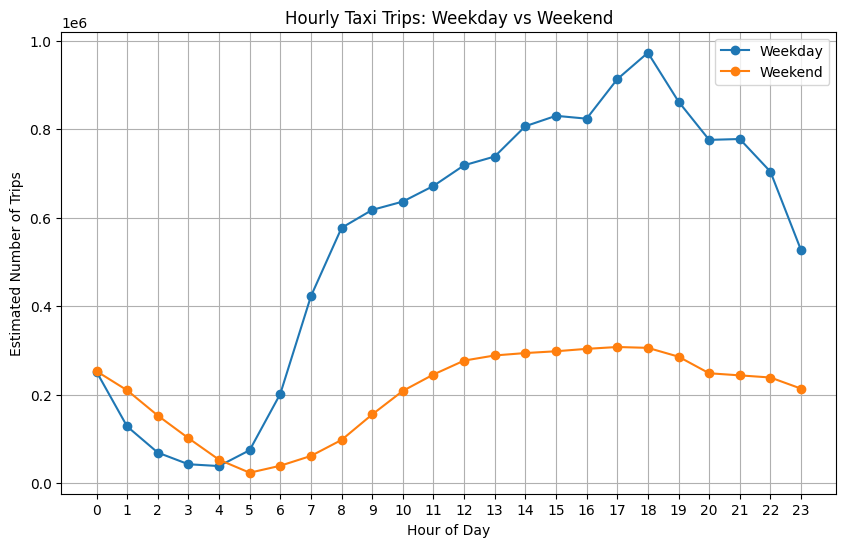

In [143]:
# Compare traffic trends for the week days and weekends

df_compare = df_nonzero.copy()

df_compare['day_type'] = df_compare['day_of_week'].apply(
    lambda x: 'Weekend' if x >= 5 else 'Weekday'
)

hourly_pattern = (
    df_compare
    .groupby(['day_type', 'pickup_hour'])
    .size()
    .reset_index(name='sample_trip_count')
)

sampling_ratio = 0.10

hourly_pattern['estimated_trip_count'] = (
    hourly_pattern['sample_trip_count'] / sampling_ratio
)

plt.figure(figsize=(10,6))

for day_type in ['Weekday', 'Weekend']:
    subset = hourly_pattern[hourly_pattern['day_type'] == day_type]

    plt.plot(subset['pickup_hour'],
             subset['estimated_trip_count'],
             marker='o',
             label=day_type)

plt.title('Hourly Taxi Trips: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Estimated Number of Trips')
plt.xticks(range(0,24))
plt.legend()
plt.grid(True)

plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

Driver scheduling optimization, schedule more drivers during peak hous, Reduce during idle or quite hours. Weekday peak is 8 to 9 AM and 5 to 7 PM. Weekedn peak is Evening & late night.
Offers promotions during quite hours. Allocate premium vehicles during peak revenue windows. Better demand forcasting, capacity planning and Traffic congestion strategy




**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [207]:
# Find top 10 pickup and dropoff zones

top_pickup = (
    df_nonzero
    .groupby('PULocationID')
    .size()
    .reset_index(name='trip_count')
)
top_pickup = top_pickup.merge(
    zones[['LocationID', 'zone', 'borough']],
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
)

top_pickup_zones = (
    top_pickup
    .sort_values('trip_count', ascending=False)
    .head(10)
)

top_pickup_zones[['zone', 'borough', 'trip_count']]


,zone,borough,trip_count
125,JFK Airport,Queens,94925
228,Upper East Side South,Manhattan,86457
154,Midtown Center,Manhattan,85393
227,Upper East Side North,Manhattan,77107
155,Midtown East,Manhattan,65200
131,LaGuardia Airport,Queens,63675
178,Penn Station/Madison Sq West,Manhattan,62983
221,Times Sq/Theatre District,Manhattan,60714
135,Lincoln Square East,Manhattan,60496
163,Murray Hill,Manhattan,54023


In [206]:
top_dropoff = (
    df_nonzero
    .groupby('DOLocationID')
    .size()
    .reset_index(name='trip_count')
)

top_dropoff = top_dropoff.merge(
    zones[['LocationID', 'zone', 'borough']],
    left_on='DOLocationID',
    right_on='LocationID',
    how='left'
)
top_dropoff_zones = (
    top_dropoff
    .sort_values('trip_count', ascending=False)
    .head(10)
)

top_dropoff_zones[['zone', 'borough', 'trip_count']]


,zone,borough,trip_count
231,Upper East Side North,Manhattan,80860
232,Upper East Side South,Manhattan,77135
157,Midtown Center,Manhattan,71143
225,Times Sq/Theatre District,Manhattan,55856
166,Murray Hill,Manhattan,53884
158,Midtown East,Manhattan,51843
138,Lincoln Square East,Manhattan,51167
234,Upper West Side South,Manhattan,50974
137,Lenox Hill West,Manhattan,48187
68,East Chelsea,Manhattan,45919


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [146]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = (
    df_nonzero
    .groupby('PULocationID')
    .size()
    .reset_index(name='pickup_count')
)

dropoff_counts = (
    df_nonzero
    .groupby('DOLocationID')
    .size()
    .reset_index(name='dropoff_count')
)

zone_flow = pickup_counts.merge(
    dropoff_counts,
    left_on='PULocationID',
    right_on='DOLocationID',
    how='outer'
)

zone_flow[['pickup_count', 'dropoff_count']] = (
    zone_flow[['pickup_count', 'dropoff_count']].fillna(0)
)

zone_flow['pickup_dropoff_ratio'] = (
    zone_flow['pickup_count'] /
    zone_flow['dropoff_count'].replace(0, 1)
)
zone_flow = zone_flow.merge(
    zones[['LocationID', 'zone', 'borough']],
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
)



In [205]:
top10_ratio = (
    zone_flow
    .sort_values('pickup_dropoff_ratio', ascending=False)
    .head(10)
)

top10_ratio[['zone', 'borough', 'pickup_dropoff_ratio']]


,zone,borough,pickup_dropoff_ratio
70,East Elmhurst,Queens,9.481481
128,JFK Airport,Queens,4.912285
134,LaGuardia Airport,Queens,2.923151
195,Rikers Island,Bronx,2.000000
182,Penn Station/Madison Sq West,Manhattan,1.584558
42,Central Park,Manhattan,1.376074
110,Greenwich Village South,Manhattan,1.375725
245,West Village,Manhattan,1.328574
158,Midtown East,Manhattan,1.257643
157,Midtown Center,Manhattan,1.200301


In [204]:
bottom10_ratio = (
    zone_flow
    .sort_values('pickup_dropoff_ratio')
    .head(10)
)

bottom10_ratio[['zone', 'borough', 'pickup_dropoff_ratio']]


,zone,borough,pickup_dropoff_ratio
29,NaN,NaN,0.000000
241,NaN,NaN,0.000000
106,NaN,NaN,0.000000
99,NaN,NaN,0.000000
172,NaN,NaN,0.000000
217,NaN,NaN,0.000000
0,Newark Airport,EWR,0.008728
26,Breezy Point/Fort Tilden/Riis Beach,Queens,0.026316
253,Windsor Terrace,Brooklyn,0.028037
247,Westerleigh,Staten Island,0.032258


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [149]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Night hours: 23, 0, 1, 2, 3, 4
night_df = df_nonzero[
    (df_nonzero['pickup_hour'] >= 23) |
    (df_nonzero['pickup_hour'] <= 4)
].copy()


In [203]:
# Count pickups in sampled data
night_pickup = (
    night_df
    .groupby('PULocationID')
    .size()
    .reset_index(name='sample_trip_count')
)

# Scale up (10% sampling → multiply by 10)
night_pickup['estimated_trip_count'] = (
    night_pickup['sample_trip_count'] * 10
)

# Merge zone info
night_pickup = night_pickup.merge(
    zones[['LocationID', 'zone', 'borough']],
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
)

# Top 10 pickup zones at night
top10_night_pickup = (
    night_pickup
    .sort_values('estimated_trip_count', ascending=False)
    .head(10)
)

top10_night_pickup[['zone', 'borough', 'estimated_trip_count']]


,zone,borough,estimated_trip_count
68,East Village,Manhattan,152140
108,JFK Airport,Queens,131730
210,West Village,Manhattan,122710
40,Clinton East,Manhattan,96920
124,Lower East Side,Manhattan,94630
93,Greenwich Village South,Manhattan,86600
192,Times Sq/Theatre District,Manhattan,76850
155,Penn Station/Madison Sq West,Manhattan,61630
138,Midtown South,Manhattan,59020
114,LaGuardia Airport,Queens,58980


In [202]:
# Count dropoffs in sampled data
night_dropoff = (
    night_df
    .groupby('DOLocationID')
    .size()
    .reset_index(name='sample_trip_count')
)

# Scale up
night_dropoff['estimated_trip_count'] = (
    night_dropoff['sample_trip_count'] * 10
)

# Merge zone info
night_dropoff = night_dropoff.merge(
    zones[['LocationID', 'zone', 'borough']],
    left_on='DOLocationID',
    right_on='LocationID',
    how='left'
)

# Top 10 dropoff zones at night
top10_night_dropoff = (
    night_dropoff
    .sort_values('estimated_trip_count', ascending=False)
    .head(10)
)

top10_night_dropoff[['zone', 'borough', 'estimated_trip_count']]


,zone,borough,estimated_trip_count
78,East Village,Manhattan,81490
46,Clinton East,Manhattan,65640
165,Murray Hill,Manhattan,60150
103,Gramercy,Manhattan,55670
67,East Chelsea,Manhattan,54590
136,Lenox Hill West,Manhattan,50760
256,Yorkville West,Manhattan,48360
242,West Village,Manhattan,48310
143,Lower East Side,Manhattan,42590
222,Sutton Place/Turtle Bay North,Manhattan,42430


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [201]:
# Filter for night hours (11 PM to 5 AM)
df_time = df_nonzero.copy()

df_time['time_period'] = df_time['pickup_hour'].apply(
    lambda x: 'Night' if (x >= 23 or x <= 4) else 'Day'
)

revenue_time = (
    df_time
    .groupby('time_period')['total_amount']
    .sum()
    .reset_index(name='sample_revenue')
)

revenue_time['estimated_revenue'] = (
    revenue_time['sample_revenue'] * 10
)

total_revenue = revenue_time['estimated_revenue'].sum()

revenue_time['revenue_share_percent'] = (
    revenue_time['estimated_revenue'] / total_revenue * 100
)

revenue_time


,time_period,sample_revenue,estimated_revenue,revenue_share_percent
0,Day,46151296.0,461512960.0,88.718010
1,Night,5868916.0,58689160.0,11.281992


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts

df_fare = df_nonzero[
    (df_nonzero['trip_distance'] > 0) &
    (df_nonzero['passenger_count'] > 0)
].copy()


df_fare['fare_per_mile'] = (
    df_fare['fare_amount'] /
    df_fare['trip_distance']
)

fare_stats = (
    df_fare
    .groupby('passenger_count')['fare_per_mile']
    .mean()
    .reset_index()
)

fare_stats['fare_per_mile_per_passenger'] = (
    fare_stats['fare_per_mile'] /
    fare_stats['passenger_count']
)

fare_stats.sort_values('passenger_count')


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Compare the average fare per mile for different days and for different times of the day

df_fpm = df_nonzero[
    (df_nonzero['trip_distance'] > 0)
].copy()

df_fpm['fare_per_mile'] = (
    df_fpm['fare_amount'] /
    df_fpm['trip_distance']
)

df_fpm = df_fpm[
    (df_fpm['fare_per_mile'] > 0) &
    (df_fpm['fare_per_mile'] < 50)
]

fare_by_hour = (
    df_fpm
    .groupby('pickup_hour')['fare_per_mile']
    .mean()
    .reset_index()
    .sort_values('pickup_hour')
)

fare_by_hour


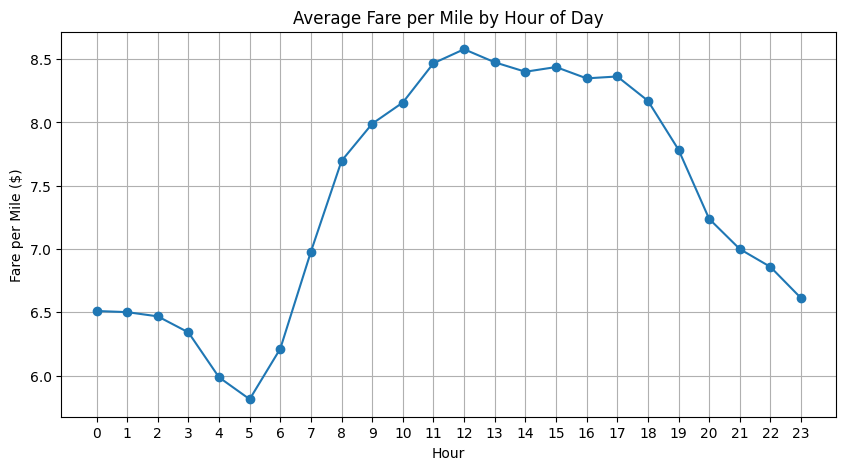

In [200]:
plt.figure(figsize=(10,5))
plt.plot(fare_by_hour['pickup_hour'],
         fare_by_hour['fare_per_mile'],
         marker='o')

plt.title('Average Fare per Mile by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Fare per Mile ($)')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()


In [ ]:
# Average fare per mile by Day of Week
fare_by_day = (
    df_fpm
    .groupby('day_of_week')['fare_per_mile']
    .mean()
    .reset_index()
    .sort_values('day_of_week')
)

day_map = {
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday',
    3: 'Thursday', 4: 'Friday',
    5: 'Saturday', 6: 'Sunday'
}

fare_by_day['day_name'] = fare_by_day['day_of_week'].map(day_map)

fare_by_day



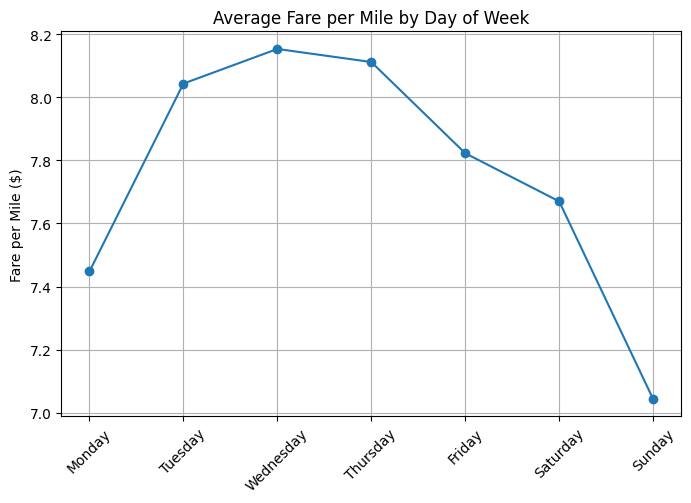

In [199]:
plt.figure(figsize=(8,5))
plt.plot(fare_by_day['day_name'],
         fare_by_day['fare_per_mile'],
         marker='o')

plt.xticks(rotation=45)
plt.title('Average Fare per Mile by Day of Week')
plt.ylabel('Fare per Mile ($)')
plt.grid(True)
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

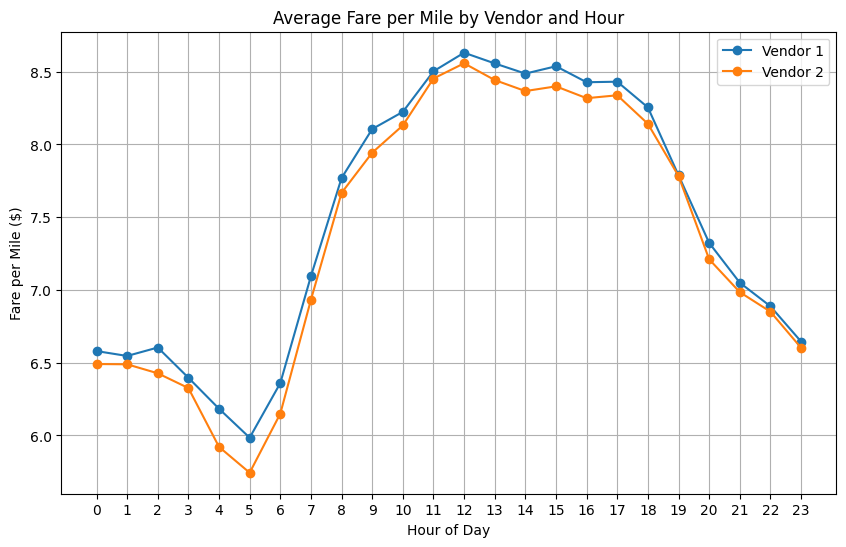

In [198]:
# Compare fare per mile for different vendors
df_vendor = df_nonzero[
    (df_nonzero['trip_distance'] > 0)
].copy()

df_vendor['fare_per_mile'] = (
    df_vendor['fare_amount'] /
    df_vendor['trip_distance']
)

df_vendor = df_vendor[
    (df_vendor['fare_per_mile'] > 0) &
    (df_vendor['fare_per_mile'] < 50)
]

vendor_hour_fpm = (
    df_vendor
    .groupby(['VendorID', 'pickup_hour'])['fare_per_mile']
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,6))

for vendor in vendor_hour_fpm['VendorID'].unique():
    subset = vendor_hour_fpm[vendor_hour_fpm['VendorID'] == vendor]

    plt.plot(subset['pickup_hour'],
             subset['fare_per_mile'],
             marker='o',
             label=f'Vendor {vendor}')

plt.title('Average Fare per Mile by Vendor and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Fare per Mile ($)')
plt.xticks(range(0,24))
plt.legend()
plt.grid(True)
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [160]:
# Defining distance tiers
df_tier = df_nonzero[
    (df_nonzero['trip_distance'] > 0)
].copy()

df_tier['fare_per_mile'] = (
    df_tier['fare_amount'] /
    df_tier['trip_distance']
)

df_tier = df_tier[
    (df_tier['fare_per_mile'] > 0) &
    (df_tier['fare_per_mile'] < 50)
]

def distance_tier(distance):
    if distance <= 2:
        return '0-2 miles'
    elif distance <= 5:
        return '2-5 miles'
    else:
        return '>5 miles'

df_tier['distance_tier'] = df_tier['trip_distance'].apply(distance_tier)

vendor_tier_fare = (
    df_tier
    .groupby(['VendorID', 'distance_tier'])['fare_per_mile']
    .mean()
    .reset_index()
)

vendor_tier_fare



,VendorID,distance_tier,fare_per_mile
0,1,0-2 miles,9.520174
1,1,2-5 miles,6.380340
2,1,>5 miles,4.425514
3,2,0-2 miles,9.418921
4,2,2-5 miles,6.547482
5,2,>5 miles,4.502794


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [197]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df_tip = df_nonzero[
    (df_nonzero['fare_amount'] > 0) &
    (df_nonzero['trip_distance'] > 0)
].copy()

df_tip['tip_percent'] = (
    df_tip['tip_amount'] /
    df_tip['fare_amount']
) * 100

df_tip = df_tip[
    (df_tip['tip_percent'] >= 0) &
    (df_tip['tip_percent'] <= 100)
]

def distance_tier(distance):
    if distance <= 2:
        return '0-2 miles'
    elif distance <= 5:
        return '2-5 miles'
    else:
        return '>5 miles'

df_tip['distance_tier'] = df_tip['trip_distance'].apply(distance_tier)

tip_by_distance = (
    df_tip
    .groupby('distance_tier')['tip_percent']
    .mean()
    .reset_index()
)

tip_by_distance


,distance_tier,tip_percent
0,0-2 miles,22.143677
1,2-5 miles,18.666708
2,>5 miles,16.438107


In [163]:
tip_by_passenger = (
    df_tip
    .groupby('passenger_count')['tip_percent']
    .mean()
    .reset_index()
)

tip_by_passenger


tip_by_passenger = tip_by_passenger[
    tip_by_passenger['passenger_count'] <= 6
]

tip_by_hour = (
    df_tip
    .groupby('pickup_hour')['tip_percent']
    .mean()
    .reset_index()
)



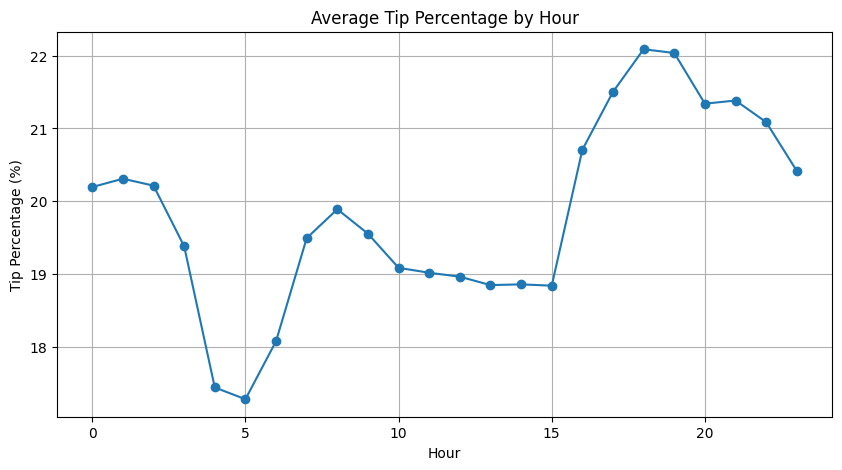

In [196]:
plt.figure(figsize=(10,5))
plt.plot(tip_by_hour['pickup_hour'],
         tip_by_hour['tip_percent'],
         marker='o')

plt.title('Average Tip Percentage by Hour')
plt.xlabel('Hour')
plt.ylabel('Tip Percentage (%)')
plt.grid(True)
plt.show()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [165]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
df_tip = df_nonzero[
    (df_nonzero['fare_amount'] > 0) &
    (df_nonzero['trip_distance'] > 0)
].copy()

df_tip['tip_percent'] = (
    df_tip['tip_amount'] /
    df_tip['fare_amount']
) * 100

# Remove extreme values
df_tip = df_tip[
    (df_tip['tip_percent'] >= 0) &
    (df_tip['tip_percent'] <= 100)
]

low_tip = df_tip[df_tip['tip_percent'] < 10]
high_tip = df_tip[df_tip['tip_percent'] > 25]

comparison = pd.DataFrame({
    'Metric': ['Avg Distance', 'Avg Duration', 'Avg Fare',
               'Avg Passenger Count'],
    'Low Tip (<10%)': [
        low_tip['trip_distance'].mean(),
        low_tip['trip_duration'].mean(),
        low_tip['fare_amount'].mean(),
        low_tip['passenger_count'].mean()
    ],
    'High Tip (>25%)': [
        high_tip['trip_distance'].mean(),
        high_tip['trip_duration'].mean(),
        high_tip['fare_amount'].mean(),
        high_tip['passenger_count'].mean()
    ]
})

comparison


,Metric,Low Tip (<10%),High Tip (>25%)
0,Avg Distance,3.914871,2.301561
1,Avg Duration,20.053935,12.740657
2,Avg Fare,21.555889,14.418033
3,Avg Passenger Count,1.412673,1.348186


In [166]:
hour_compare = pd.DataFrame({
    'Low Tip Hour Mean': low_tip.groupby('pickup_hour').size(),
    'High Tip Hour Mean': high_tip.groupby('pickup_hour').size()
})

low_tip['payment_type'].value_counts(normalize=True)
high_tip['payment_type'].value_counts(normalize=True)


,proportion
payment_type,
1,0.999964
2,0.000021
4,0.000011
3,0.000004


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [195]:
# See how passenger count varies across hours and days

df_pass = df_nonzero[
    (df_nonzero['passenger_count'] > 0)
].copy()

df_pass = df_pass[df_pass['passenger_count'] <= 6]

passenger_by_hour = (
    df_pass
    .groupby('pickup_hour')['passenger_count']
    .mean()
    .reset_index()
    .sort_values('pickup_hour')
)

passenger_by_hour



,pickup_hour,passenger_count
0,0,1.434068
1,1,1.439473
2,2,1.456567
3,3,1.460275
4,4,1.407226
5,5,1.299812
6,6,1.260277
7,7,1.28239
8,8,1.29981
9,9,1.323631


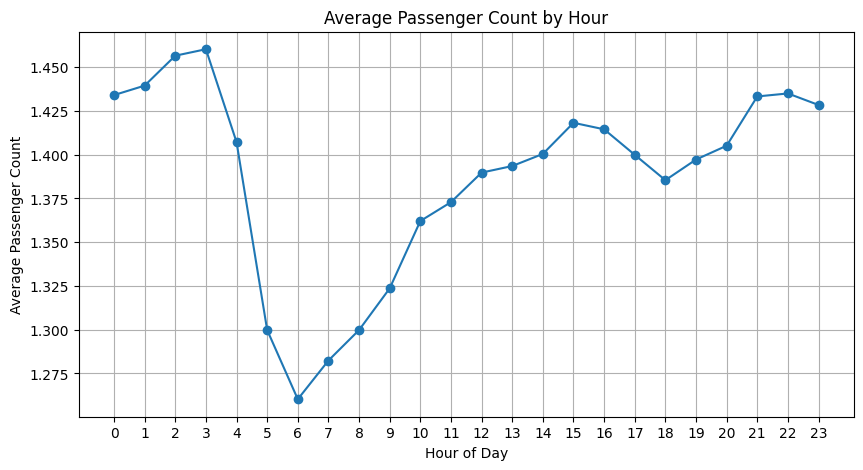

In [171]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(passenger_by_hour['pickup_hour'],
         passenger_by_hour['passenger_count'],
         marker='o')

plt.title('Average Passenger Count by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Passenger Count')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()


In [194]:
# See passenger count by Day of Week
passenger_by_day = (
    df_pass
    .groupby('day_of_week')['passenger_count']
    .mean()
    .reset_index()
    .sort_values('day_of_week')
)

day_map = {
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday',
    3: 'Thursday', 4: 'Friday',
    5: 'Saturday', 6: 'Sunday'
}

passenger_by_day['day_name'] = passenger_by_day['day_of_week'].map(day_map)

passenger_by_day



,day_of_week,passenger_count,day_name
0,0,1.367614,Monday
1,1,1.339029,Tuesday
2,2,1.335421,Wednesday
3,3,1.349315,Thursday
4,4,1.407851,Friday
5,5,1.488471,Saturday
6,6,1.472735,Sunday


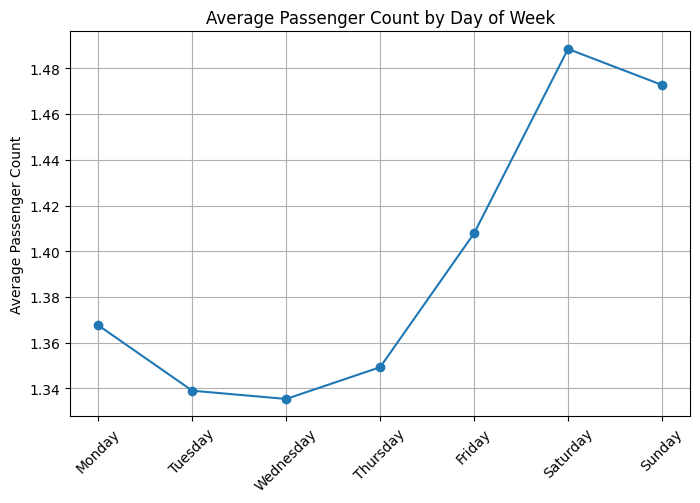

In [170]:
plt.figure(figsize=(8,5))
plt.plot(passenger_by_day['day_name'],
         passenger_by_day['passenger_count'],
         marker='o')

plt.xticks(rotation=45)
plt.title('Average Passenger Count by Day of Week')
plt.ylabel('Average Passenger Count')
plt.grid(True)
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [172]:
# How does passenger count vary across zones

df_zone_pass = df_nonzero[
    (df_nonzero['passenger_count'] > 0) &
    (df_nonzero['passenger_count'] <= 6)
].copy()

zone_passenger = (
    df_zone_pass
    .groupby('PULocationID')['passenger_count']
    .mean()
    .reset_index(name='avg_passenger_count')
)

zone_passenger = zone_passenger.merge(
    zones[['LocationID', 'zone', 'borough']],
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
)

top_group_zones = (
    zone_passenger
    .sort_values('avg_passenger_count', ascending=False)
    .head(10)
)

top_group_zones[['zone', 'borough', 'avg_passenger_count']]



,zone,borough,avg_passenger_count
104,Green-Wood Cemetery,Brooklyn,2.0
5,Arrochar/Fort Wadsworth,Staten Island,1.954545
186,Red Hook,Brooklyn,1.861878
11,Battery Park,Manhattan,1.758145
57,Country Club,Bronx,1.666667
198,Saint Michaels Cemetery/Woodside,Queens,1.666667
170,Ocean Parkway South,Brooklyn,1.625
65,DUMBO/Vinegar Hill,Brooklyn,1.594533
32,Brooklyn Navy Yard,Brooklyn,1.590909
92,Flushing Meadows-Corona Park,Queens,1.555556


In [173]:
# Zones with lowest avg passenger count
lowest_group_zones = (
    zone_passenger
    .sort_values('avg_passenger_count')
    .head(10)
)

lowest_group_zones[['zone', 'borough', 'avg_passenger_count']]


,zone,borough,avg_passenger_count
1,Jamaica Bay,Queens,1.0
2,Allerton/Pelham Gardens,Bronx,1.0
4,Arden Heights,Staten Island,1.0
14,Bay Terrace/Fort Totten,Queens,1.0
26,Breezy Point/Fort Tilden/Riis Beach,Queens,1.0
29,Bronx Park,Bronx,1.0
30,Bronxdale,Bronx,1.0
22,Bloomfield/Emerson Hill,Staten Island,1.0
49,Co-Op City,Bronx,1.0
53,Coney Island,Brooklyn,1.0


In [178]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

zone_avg_passenger = (
    df_nonzero[
        (df_nonzero['passenger_count'] > 0) &
        (df_nonzero['passenger_count'] <= 6)
    ]
    .groupby('PULocationID', as_index=False)['passenger_count']
    .mean()
)

zone_avg_passenger.rename(
    columns={'passenger_count': 'avg_passenger_count'},
    inplace=True
)

zone_avg_passenger.head()


,PULocationID,avg_passenger_count
0,1,1.333333
1,2,1.0
2,3,1.0
3,4,1.445634
4,5,1.0


In [180]:
if 'PULocationID' in zones_with_trips.columns:
    zones_with_trips = zones_with_trips.drop(columns=['PULocationID'])


In [181]:
zones_with_trips = zones_with_trips.merge(
    zone_avg_passenger,
    left_on='LocationID',
    right_on='PULocationID',
    how='left'
)


In [182]:
zones_with_trips.drop(columns=['PULocationID'], inplace=True)


In [183]:
zones_with_trips['avg_passenger_count'] = (
    zones_with_trips['avg_passenger_count'].fillna(0)
)
zones_with_trips[['zone', 'borough', 'trip_count', 'avg_passenger_count']].head()


,zone,borough,trip_count,avg_passenger_count
0,Newark Airport,EWR,45.0,1.333333
1,Jamaica Bay,Queens,2.0,1.0
2,Allerton/Pelham Gardens,Bronx,31.0,1.0
3,Alphabet City,Manhattan,1813.0,1.445634
4,Arden Heights,Staten Island,9.0,1.0


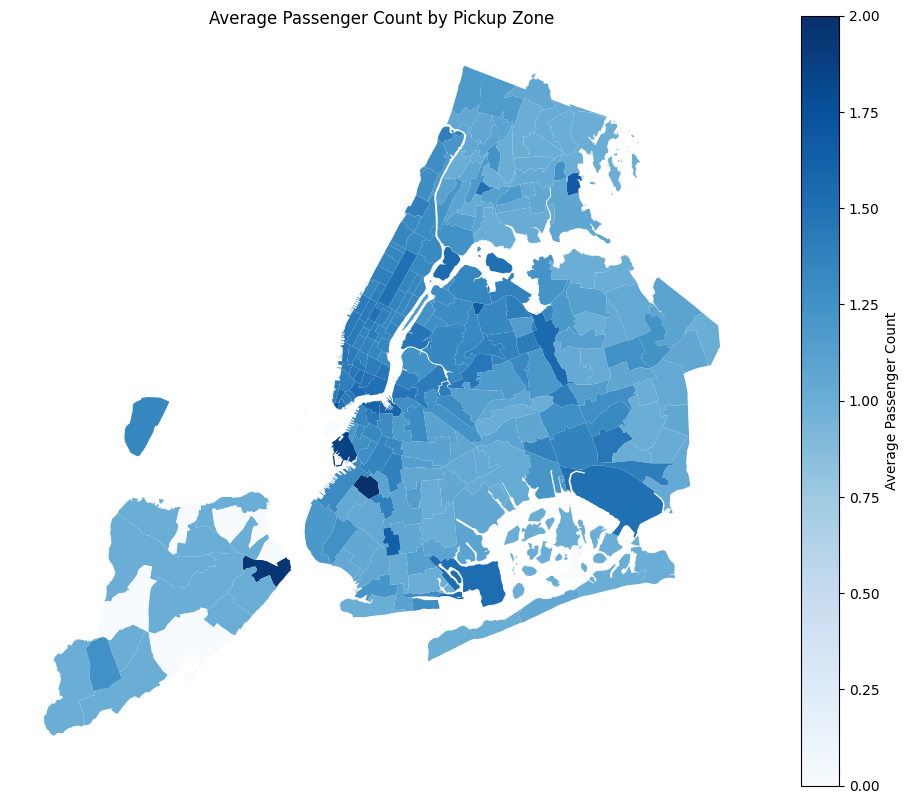

In [184]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

zones_with_trips.plot(
    column='avg_passenger_count',
    ax=ax,
    cmap='Blues',
    legend=True,
    legend_kwds={'label': "Average Passenger Count"}
)

ax.set_title("Average Passenger Count by Pickup Zone")
ax.axis('off')

plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [193]:
# How often is each surcharge applied?
surcharge_columns = [
    'extra',
    'mta_tax',
    'improvement_surcharge',
    'congestion_surcharge',
    'airport_fee'
]

surcharge_frequency = {}

total_trips = len(df_nonzero)

for col in surcharge_columns:
    applied = (df_nonzero[col] > 0).sum()
    surcharge_frequency[col] = {
        'count': applied,
        'percentage': (applied / total_trips) * 100
    }

surcharge_frequency
pd.DataFrame(surcharge_frequency).T



,count,percentage
extra,1126593.0,62.321866
mta_tax,1796327.0,99.370803
improvement_surcharge,1807659.0,99.997677
congestion_surcharge,1679903.0,92.930357
airport_fee,158773.0,8.783145


In [192]:
# When extra charge is applied most by hour
extra_by_hour = (
    df_nonzero[df_nonzero['extra'] > 0]
    .groupby('pickup_hour')
    .size()
    .reset_index(name='count')
)

# Get percentage
hourly_total = df_nonzero.groupby('pickup_hour').size()

extra_by_hour['percentage'] = (
    extra_by_hour['count'] /
    hourly_total.loc[extra_by_hour['pickup_hour']].values
) * 100


In [191]:
# Which zones has most Airport fee
airport_zones = (
    df_nonzero[df_nonzero['airport_fee'] > 0]
    .groupby('PULocationID')
    .size()
    .reset_index(name='airport_trip_count')
)

airport_zones = airport_zones.merge(
    zones[['LocationID', 'zone', 'borough']],
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
)

airport_zones.sort_values('airport_trip_count', ascending=False).head(10)


,PULocationID,airport_trip_count,LocationID,zone,borough
43,132,88828,132.0,JFK Airport,Queens
46,138,62660,138.0,LaGuardia Airport,Queens
21,70,5537,70.0,East Elmhurst,Queens
102,264,1198,NaN,NaN,NaN
1,10,55,10.0,Baisley Park,Queens
33,93,34,93.0,Flushing Meadows-Corona Park,Queens
84,230,30,230.0,Times Sq/Theatre District,Manhattan
65,170,29,170.0,Murray Hill,Manhattan
40,129,27,129.0,Jackson Heights,Queens
51,145,22,145.0,Long Island City/Hunters Point,Queens


In [190]:
# Congestion Surcharge
congestion_zones = (
    df_nonzero[df_nonzero['congestion_surcharge'] > 0]
    .groupby('PULocationID')
    .size()
    .reset_index(name='congestion_trip_count')
)
congestion_zones = congestion_zones.merge(
    zones[['LocationID', 'zone', 'borough']],
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
)

congestion_zones.sort_values('congestion_trip_count', ascending=False).head(10)



,PULocationID,congestion_trip_count,LocationID,zone,borough
176,237,86278,237.0,Upper East Side South,Manhattan
116,161,84786,161.0,Midtown Center,Manhattan
175,236,76767,236.0,Upper East Side North,Manhattan
117,162,64821,162.0,Midtown East,Manhattan
132,186,62647,186.0,Penn Station/Madison Sq West,Manhattan
103,142,60260,142.0,Lincoln Square East,Manhattan
169,230,59789,230.0,Times Sq/Theatre District,Manhattan
124,170,53687,170.0,Murray Hill,Manhattan
118,163,52864,163.0,Midtown North,Manhattan
178,239,49844,239.0,Upper West Side South,Manhattan


In [189]:
df_nonzero[df_nonzero['congestion_surcharge'] > 0] \
    .groupby('day_of_week') \
    .size()


,0
day_of_week,
0,206384
1,244296
2,259957
3,265541
4,249161
5,246688
6,207876


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
# Increase driver supply during weekday commute hours. Weekend late night hours. Reduce active fleet during 3-5 AM weekdays. Preposition driver near airport zones during flight peaks
# Night life district during evening hours. Suggest alternative routes dynamically to avoid congestion or low speed routes during peak. This will lower fuel cost, better driver hourly income.
# Optimize driver earning via Tip patterns, prioritize dispatch for credit card heavy zones, entertainment areas, moderate distance trips. Allocate larger vehicle to airports & tourist zones.
# Night generates concentrated high-density activity, Focus on efficiency and traffic optimization, increase driver presence in nightlife areas, keeping dynamic pricing window.
# Reduce idle time during quite hours. Align dispatch with flight schedule, use queue optimization model

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
# Time based zone clustering as morning commute has high demand on residential zones, high dropoff  in business districts. Postion cabs in residential zones. Prepare a one way flow into midtown
# Evening commute reverse flow from business districts, concentrate cabs in business districts, use congestion aware routing and prioritize shorter trips during heavy traffic.
# Postion larger vehicles near nighlife clusters, increase in entertainment zones. Early morning reduce active fleet, concentrate near Airports and transport hubs to minimize idle roadming.
# Pickup zones ratio is > 1, position cab before peak hours. In Business districts and Tourist hubs keep idle drivers nearby. Seasonal & Monthly adjustment, Increase supply during
# summer, December for tourism peak and holiday spike. Adjust fleet size seasonally. Revenue weighted positioning, position cabs more in high revenue per hour zones, moderate
# congestion but yield zones. Passenger density based fleet mix on Airports, Business districts and night lief, allocate larger vehicles and standardise sedans.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
# The data shows string weekday commute peaks which require time based micro dynamic pricing. Instead of flat surge use moderate peak multiplier, during 8-9 AM, 5-7 PM weekdasy
# 10PM - 1 AM weekends. Provide off peak discounts, 3 - 5 % during 3-5 AM, minimum discount duruing mid afternoon. This approach will smooth the demand, reduce the idle fleet
# and improve the utilization.
# Zone specific pricing, some zones has oversupply and others has undersupply. On high demand + balanced zones provide a standard pricing and on high-demand: undersupplied zones
# provide slight +5% premium. This will improve spatial balance and encourage driver repositioning.
# On congestion based time component increase time based rate slightly during severe congestion windows. Group based pricing incentive, provide encouraged multi-passenger rides
# higher occupancy has better rate per trip revenue efficiency.
# Payment incentive, offer loyalty points and small discounts for card/app payments this will increase recorded tip % and revenue transparency.
# Protect driver earnings, increase or maintain driver earnings per hour, and avoid to reduce trip frequency significantly.